# first upload your kaggle.json - from your profile create an API token - and then run the following

In [ ]:
## To download the data using kaggle
#!kaggle competitions download -c ashrae-energy-prediction

## Importing our libraries


In [ ]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns

## Loading the data

In [ ]:
train_df= pd.read_csv('content/train.csv',  )
building_df= pd.read_csv('content/building_metadata.csv' )
weather_df= pd.read_csv('content/weather_train.csv')
train_df.head()

FileNotFoundError: ignored

## specifying only 10 buildings

In [ ]:
building_df= building_df[  building_df['building_id'] < 11 ]
train_df= train_df[ train_df['building_id'] < 11 ]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111156 entries, 0 to 20213746
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    111156 non-null  int64  
 1   meter          111156 non-null  int64  
 2   timestamp      111156 non-null  object 
 3   meter_reading  111156 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.2+ MB


## Parsing the timestamp column as date format

In [ ]:
train_df['timestamp']= pd.to_datetime(train_df['timestamp'])
weather_df['timestamp']= pd.to_datetime(weather_df['timestamp'])

## printing the columns and the info of train_df

In [ ]:
print ( train_df.columns,'\n' )
print( building_df.columns,'\n' )
print( weather_df.columns,'\n' )
train_df.info()

Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object') 

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object') 

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111156 entries, 0 to 20213746
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   building_id    111156 non-null  int64         
 1   meter          111156 non-null  int64         
 2   timestamp      111156 non-null  datetime64[ns]
 3   meter_reading  111156 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.2 MB


## merging weather_df and building_df on the site column

In [ ]:
building_weather= pd.merge( weather_df , building_df , on='site_id')
building_weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,square_feet,year_built,floor_count
0,0,2016-01-01,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,Education,7432,2008.0,NaN
1,0,2016-01-01,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,Education,2720,2004.0,NaN
2,0,2016-01-01,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2,Education,5376,1991.0,NaN
3,0,2016-01-01,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,3,Education,23685,2002.0,NaN
4,0,2016-01-01,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,4,Education,116607,1975.0,NaN


releasing some memo space

In [ ]:
del weather_df
del building_df

In [ ]:
len( building_weather )

96624

## merging what's left from the data together
### reshaping the dataframe as for each building and each meter type and then sorting by time stamp

In [ ]:
all_data_files= pd.merge(train_df , building_weather , on=['building_id', 'timestamp']).drop(columns='site_id').set_index(['building_id','meter','timestamp']).sort_index()
all_data_files.head()

meter_reading  air_temperature  \
building_id meter timestamp                                             
0           0     2016-01-01 00:00:00            0.0             25.0   
                  2016-01-01 01:00:00            0.0             24.4   
                  2016-01-01 02:00:00            0.0             22.8   
                  2016-01-01 03:00:00            0.0             21.1   
                  2016-01-01 04:00:00            0.0             20.0   

                                       cloud_coverage  dew_temperature  \
building_id meter timestamp                                              
0           0     2016-01-01 00:00:00             6.0             20.0   
                  2016-01-01 01:00:00             NaN             21.1   
                  2016-01-01 02:00:00             2.0             21.1   
                  2016-01-01 03:00:00             2.0             20.6   
                  2016-01-01 04:00:00             2.0             20.0   

                                       precip_depth_1_hr  sea_level_pressure  \
building_id meter timestamp                                                    
0           0     2016-01-01 00:00:00                NaN              1019.7   
                  2016-01-01 01:00:00               -1.0              1020.2   
                  2016-01-01 02:00:00                0.0              1020.2   
                  2016-01-01 03:00:00                0.0              1020.1   
                  2016-01-01 04:00:00               -1.0              1020.0   

                                       wind_direction  wind_speed primary_use  \
building_id meter timestamp                                                     
0           0     2016-01-01 00:00:00             0.0         0.0   Education   
                  2016-01-01 01:00:00            70.0         1.5   Education   
                  2016-01-01 02:00:00             0.0         0.0   Education   
                  2016-01-01 03:00:00             0.0         0.0   Education   
                  2016-01-01 04:00:00           250.0         2.6   Education   

                                       square_feet  year_built  floor_count  
building_id meter timestamp                                                  
0           0     2016-01-01 00:00:00         7432      2008.0          NaN  
                  2016-01-01 01:00:00         7432      2008.0          NaN  
                  2016-01-01 02:00:00         7432      2008.0          NaN  
                  2016-01-01 03:00:00         7432      2008.0          NaN  
                  2016-01-01 04:00:00         7432      2008.0          NaN

In [ ]:
len( all_data_files )

111156

In [ ]:
del building_weather
del train_df

In [ ]:
all_data_files.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20125605 entries, (0, 0, Timestamp('2016-01-01 00:00:00')) to (1448, 0, Timestamp('2016-12-31 23:00:00'))
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   meter_reading       float64
 1   air_temperature     float64
 2   cloud_coverage      float64
 3   dew_temperature     float64
 4   precip_depth_1_hr   float64
 5   sea_level_pressure  float64
 6   wind_direction      float64
 7   wind_speed          float64
 8   primary_use         object 
 9   square_feet         int64  
 10  year_built          float64
 11  floor_count         float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.9+ GB


### converting the primary_use to dummy variable
### and then concatinating the dummy columns into our data

In [ ]:
all_data_files=all_data_files.join( pd.get_dummies( all_data_files['primary_use'] , prefix='usage_'  )).drop(columns='primary_use')

In [ ]:
all_data_files.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 111156 entries, (0, 0, Timestamp('2016-01-01 00:00:00')) to (10, 0, Timestamp('2016-12-31 23:00:00'))
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   meter_reading                         111156 non-null  float64
 1   air_temperature                       111123 non-null  float64
 2   cloud_coverage                        62832 non-null   float64
 3   dew_temperature                       111123 non-null  float64
 4   precip_depth_1_hr                     111145 non-null  float64
 5   sea_level_pressure                    110089 non-null  float64
 6   wind_direction                        107942 non-null  float64
 7   wind_speed                            111156 non-null  float64
 8   square_feet                           111156 non-null  int64  
 9   year_built                            111156 non-null  float64

In [ ]:
all_data_files.describe()

,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built,floor_count,usage__Education,usage__Entertainment/public assembly,usage__Lodging/residential,usage__Office
count,111156.000000,111123.000000,62832.000000,111123.000000,111145.000000,110089.000000,107942.000000,111156.000000,111156.000000,111156.000000,0.0,111156.000000,111156.000000,111156.000000,111156.000000
mean,498.081374,23.025007,3.048685,17.011486,1.388493,1017.961614,155.492394,3.360759,70639.416010,1996.299336,NaN,0.697569,0.079024,0.079024,0.144383
std,982.588532,5.935097,2.106536,6.394679,13.065341,3.997847,117.966058,2.149582,97881.471493,10.783587,NaN,0.459313,0.269778,0.269778,0.351479
min,0.000000,1.700000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000,2720.000000,1975.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.400000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000,8000.000000,1989.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,85.593000,23.900000,2.000000,18.300000,0.000000,1018.000000,140.000000,3.100000,27000.000000,2000.000000,NaN,1.000000,0.000000,0.000000,0.000000
75%,485.983000,27.200000,4.000000,22.200000,0.000000,1020.500000,260.000000,4.600000,116607.000000,2004.000000,NaN,1.000000,0.000000,0.000000,0.000000
max,8442.070000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000,370773.000000,2010.000000,NaN,1.000000,1.000000,1.000000,1.000000


In [ ]:
all_data_files

meter_reading  air_temperature  \
building_id meter timestamp                                             
0           0     2016-01-01 00:00:00           0.00             25.0   
                  2016-01-01 01:00:00           0.00             24.4   
                  2016-01-01 02:00:00           0.00             22.8   
                  2016-01-01 03:00:00           0.00             21.1   
                  2016-01-01 04:00:00           0.00             20.0   
...                                              ...              ...   
10          0     2016-12-31 19:00:00        2036.42             22.8   
                  2016-12-31 20:00:00        1987.62             23.3   
                  2016-12-31 21:00:00        1952.80             23.3   
                  2016-12-31 22:00:00        1874.65             22.8   
                  2016-12-31 23:00:00        1863.73             20.6   

                                       cloud_coverage  dew_temperature  \
building_id meter timestamp                                              
0           0     2016-01-01 00:00:00             6.0             20.0   
                  2016-01-01 01:00:00             NaN             21.1   
                  2016-01-01 02:00:00             2.0             21.1   
                  2016-01-01 03:00:00             2.0             20.6   
                  2016-01-01 04:00:00             2.0             20.0   
...                                               ...              ...   
10          0     2016-12-31 19:00:00             NaN             10.0   
                  2016-12-31 20:00:00             NaN              8.9   
                  2016-12-31 21:00:00             NaN             10.0   
                  2016-12-31 22:00:00             NaN             10.0   
                  2016-12-31 23:00:00             NaN             10.0   

                                       precip_depth_1_hr  sea_level_pressure  \
building_id meter timestamp                                                    
0           0     2016-01-01 00:00:00                NaN              1019.7   
                  2016-01-01 01:00:00               -1.0              1020.2   
                  2016-01-01 02:00:00                0.0              1020.2   
                  2016-01-01 03:00:00                0.0              1020.1   
                  2016-01-01 04:00:00               -1.0              1020.0   
...                                                  ...                 ...   
10          0     2016-12-31 19:00:00                0.0              1021.7   
                  2016-12-31 20:00:00                0.0              1021.0   
                  2016-12-31 21:00:00                0.0              1021.1   
                  2016-12-31 22:00:00                0.0              1021.1   
                  2016-12-31 23:00:00                0.0              1021.1   

                                       wind_direction  wind_speed  \
building_id meter timestamp                                         
0           0     2016-01-01 00:00:00             0.0         0.0   
                  2016-01-01 01:00:00            70.0         1.5   
                  2016-01-01 02:00:00             0.0         0.0   
                  2016-01-01 03:00:00             0.0         0.0   
                  2016-01-01 04:00:00           250.0         2.6   
...                                               ...         ...   
10          0     2016-12-31 19:00:00           140.0         5.7   
                  2016-12-31 20:00:00           170.0         4.1   
                  2016-12-31 21:00:00           150.0         4.1   
                  2016-12-31 22:00:00           160.0         3.1   
                  2016-12-31 23:00:00             0.0         0.0   

                                       square_feet  year_built  floor_count  \
building_id meter timestamp                                                   
0           0     2016-01-01 

Showing only building 1 and meter 1 

In [ ]:
all_data_files.loc[0,0]

,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built,floor_count,usage__Education,usage__Entertainment/public assembly,usage__Lodging/residential,usage__Office
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.000,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,7432,2008.0,NaN,1,0,0,0
2016-01-01 01:00:00,0.000,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,7432,2008.0,NaN,1,0,0,0
2016-01-01 02:00:00,0.000,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,7432,2008.0,NaN,1,0,0,0
2016-01-01 03:00:00,0.000,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,7432,2008.0,NaN,1,0,0,0
2016-01-01 04:00:00,0.000,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,7432,2008.0,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,232.071,22.8,NaN,10.0,0.0,1021.7,140.0,5.7,7432,2008.0,NaN,1,0,0,0
2016-12-31 20:00:00,189.069,23.3,NaN,8.9,0.0,1021.0,170.0,4.1,7432,2008.0,NaN,1,0,0,0
2016-12-31 21:00:00,169.958,23.3,NaN,10.0,0.0,1021.1,150.0,4.1,7432,2008.0,NaN,1,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='timestamp', ylabel='meter_reading'>

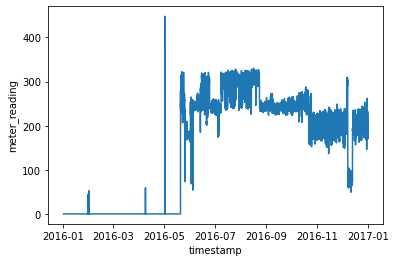

In [ ]:
sns.lineplot(all_data_files.loc[0,0].index , all_data_files.loc[0,0].meter_reading )

# Creating a plot for each building

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

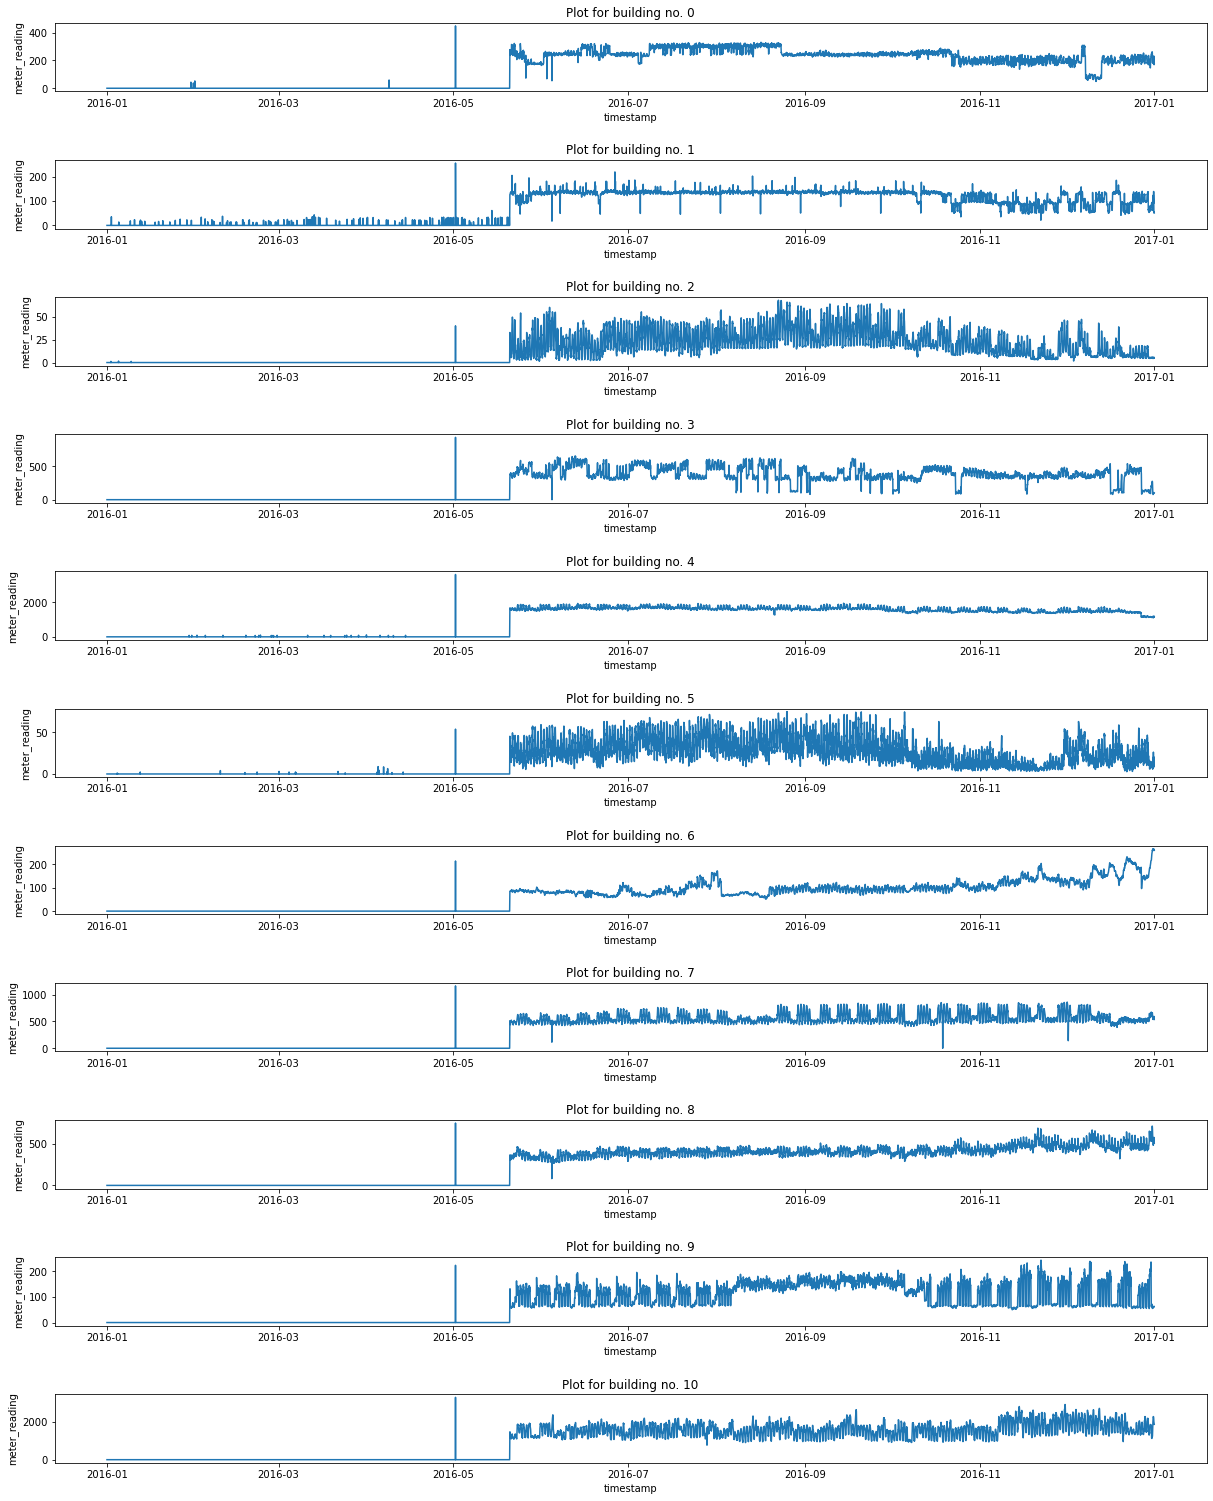

In [ ]:
fig , ax = plt.subplots(11,1 , figsize=(20,25 ))
for building in np.arange(11):
    sns.lineplot(all_data_files.loc[building,0].index ,
                 all_data_files.loc[building,0].meter_reading , 
                 ax=ax[building])
    ax[building].set_title(f'Plot for building no. {building}')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=3, 
                    hspace=1)
plt.show()